# Computer Vision Project - 2

### Import Neccesary libraries to be used in the project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random

# import warnings
import warnings
warnings.filterwarnings("ignore")

#import packages of tensorflow and keras 
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,UpSampling2D,Input,Convolution2D,MaxPooling2D,ZeroPadding2D,Conv2DTranspose
from tensorflow.keras.layers import BatchNormalization,Activation,Reshape,Dense,Dropout,Softmax,Embedding,Concatenate,Flatten
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.backend import epsilon, log


#mobilenet
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

#### Connect to google drive

In [2]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# PART-1

### • DOMAIN:
Entertainment
### • CONTEXT:
Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription basis. Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on the movie and clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer vision and multimedia experts who need to detect faces from screen shots from the movie scene.
### • DATA DESCRIPTION:
The dataset comprises of images and its mask where there is a human face.
### • PROJECT OBJECTIVE:
Face detection from training images

### 1. Import the dataset.

In [3]:
# import the images which are taken from screenshots of the different movies.
path='/content/drive/MyDrive/CNN-Project-2/Part 1- Train data - images.npy'
face_mask_data = np.load(path,allow_pickle=True)

In [4]:
# lets check for shape of the data
face_mask_data.shape

# observation : We can see there are 409 with 2 channels which are masks and features.

(409, 2)

In [5]:
# lets see the data which they look like. 
face_mask_data[5][0]

# observation : we can say that this a image with feature values

array([[[182, 184, 197],
        [182, 184, 197],
        [184, 186, 199],
        ...,
        [ 35,  69,  94],
        [ 34,  68,  93],
        [ 28,  62,  87]],

       [[183, 185, 198],
        [190, 192, 205],
        [182, 184, 197],
        ...,
        [ 35,  69,  94],
        [ 35,  69,  94],
        [ 31,  65,  90]],

       [[188, 190, 203],
        [185, 187, 200],
        [197, 199, 212],
        ...,
        [ 33,  67,  94],
        [ 33,  67,  94],
        [ 30,  64,  91]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [6]:
# lets see the mask data for the fifth image
face_mask_data[5][1]

# we can see that there is 2 faces in the image.lets visualize the image and see thhat the image have 2 faces or not.

[{'imageHeight': 500,
  'imageWidth': 500,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.486, 'y': 0.046}, {'x': 0.678, 'y': 0.272}]},
 {'imageHeight': 500,
  'imageWidth': 500,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.374, 'y': 0.524}, {'x': 0.542, 'y': 0.794}]}]

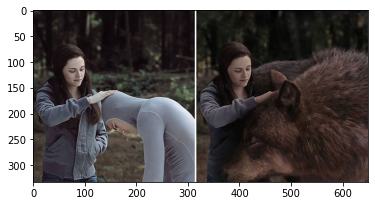

In [7]:
# visualize the first image

plt.imshow(face_mask_data[0][0])

# observation : We can see that there is 2 faces in the image which we are already seen in mask data.

### 2. Create features (images) and labels (mask) using that data.

In [8]:
# initialize the arrays of masks and images with size of 224X224 with 3 channels
masks = np.zeros((int(face_mask_data.shape[0]), 224, 224))
images = np.zeros((int(face_mask_data.shape[0]), 224, 224, 3))

# loop upto 409 images
for i in range(face_mask_data.shape[0]):
    img = face_mask_data[i][0]
    # resize the image
    img = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
    try:
        img = img[:, :, :3]
    except:
        continue
    
    images[i] = preprocess_input(np.array(img,dtype=np.float32))
    for j in face_mask_data[i][1]:
        x1 = int(j["points"][0]['x'] * 224)
        x2 = int(j["points"][1]['x'] * 224)
        y1 = int(j["points"][0]['y'] * 224)
        y2 = int(j["points"][1]['y'] * 224)
        masks[i][y1:y2, x1:x2] = 1

In [9]:
del face_mask_data

In [10]:
# lets see the shape of images and masks
print(images.shape,masks.shape)

# observation : We can see that images are of 224X224 size with 3 channels

(409, 224, 224, 3) (409, 224, 224)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


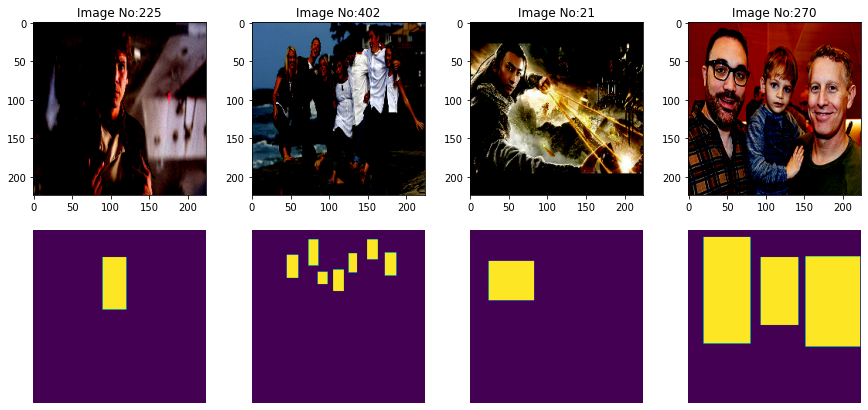

In [11]:
# Lets visualize some images and with their masks

plt.figure(figsize = (15,7))
for i in range(4) : 
    ax = plt.subplot(2,4,i+1)
    n=int(random.randint(0,408))
    plt.imshow(images[n])
    plt.title('Image No:%i'%n)
    ax = plt.subplot(2,4,i+5) 
    plt.imshow(masks[n])
    ax.axis("off")

#### Observation : We can see in first row we have images and in next row we have masks of the respective images.

### 3. Mask detection model:

#### Design a face mask detection model (U-net)

In [12]:
# make a function which returns the unet_model

def unet_model(trainable=True):
    # make input layer for the model
    inputs = Input(shape=(224, 224, 3), name="input_image")
    # initialize the Mobilenet predefined model
    model = MobileNetV2(input_tensor=inputs, include_top=False, alpha=1.0 ,weights="imagenet")

    # loop over all layers in the model
    for layer in model.layers:
        layer.trainable = trainable
    # make a list of trainable layers  
    layer_names = [
        'input_image',
        'block_1_expand_relu',
        'block_3_expand_relu',
        'block_6_expand_relu',
        ]
    # make list of all layers in the model
    base_model_outputs = [model.get_layer(name).output for name in layer_names]
    # add the last layer of the model to train
    train_layer = model.get_layer("block_13_expand_relu").output
    # initialize different filter sizes
    filter_size = [16, 32, 48, 64]
    
    for i in range(1,len(base_model_outputs)+1):
        # save previous layer
        previous_layer = base_model_outputs[-i]
        train_layer = UpSampling2D((2, 2))(train_layer)
        # concat previous and present layer
        train_layer = Concatenate()([train_layer, previous_layer])
        # add conv layer to the model
        train_layer = Conv2D(filter_size[-i], (3, 3), padding="same")(train_layer)
        train_layer = BatchNormalization()(train_layer)
        train_layer = Activation("relu")(train_layer)
        
        train_layer = Conv2D(filter_size[-i], (3, 3), padding="same")(train_layer)
        train_layer = BatchNormalization()(train_layer)
        train_layer = Activation("relu")(train_layer)
    # add last layer woth conv2d    
    train_layer = Conv2D(1, (1, 1), padding="same")(train_layer)
    train_layer = Activation("sigmoid")(train_layer)
    
    # retturn the model
    return Model(inputs=model.input, outputs=train_layer)

In [13]:
# initilize the model
model = unet_model(trainable=False)

9420800/9406464 [==============================] - 0s 0us/step


In [14]:
# check for summary of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_image (InputLayer)       [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_image[0][0]']            
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

#### Observation : We created our model and our data is ready. so, lets train the model eith our data. before modeling lets make a own dice function and loss function. 

In [15]:
# make function for dice coefficient
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + epsilon())

# make a function for loss function.
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

In [16]:
# lets compile the model with user defined loss and user defined metric - dice_coefficent.
# lets use Adam optimizer to optimize the loss.
model.compile(loss=loss, optimizer='adam', metrics=[dice_coefficient])

# lets fit the data into model with 20 epochs
model.fit(images,masks,validation_split=0.2, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
11/11 [==============================] - 155s 14s/step - loss: 1.6917 - dice_coefficient: 0.3411 - val_loss: 8.8837 - val_dice_coefficient: 0.2325
Epoch 2/20
11/11 [==============================] - 150s 14s/step - loss: 1.1668 - dice_coefficient: 0.4708 - val_loss: 4.6192 - val_dice_coefficient: 0.3854
Epoch 3/20
11/11 [==============================] - 149s 14s/step - loss: 1.0371 - dice_coefficient: 0.4855 - val_loss: 6.8571 - val_dice_coefficient: 0.3119
Epoch 4/20
11/11 [==============================] - 151s 14s/step - loss: 0.9417 - dice_coefficient: 0.5247 - val_loss: 6.4519 - val_dice_coefficient: 0.2923
Epoch 5/20
11/11 [==============================] - 151s 14s/step - loss: 0.8974 - dice_coefficient: 0.5394 - val_loss: 3.1000 - val_dice_coefficient: 0.3932
Epoch 6/20
11/11 [==============================] - 151s 14s/step - loss: 0.8193 - dice_coefficient: 0.5572 - val_loss: 2.4192 - val_dice_coefficient: 0.4062
Epoch 7/20
11/11 [==============================] - 

#### Observation : 
* We can see that Dice_coefficient in train data is arround 0.80 adn in validation data around 0.50
* Loss is about  0.28 in training and 0.90 in validation.
* In this training we are facing Overfitting condition.but it is better because we are not training with the all layers in the model so we are getting over fitting.
* for large GPU systems we can run whole u-net model then the results will be good.
* But the dice coefficient is 0.50 in validation that should be a good score.
* Lets predict a image using the model which is trained on the data.

In [17]:
# make path of test image
filename = "/content/drive/MyDrive/CNN-Project-2/Part 1Test Data - Prediction Image.jpeg"
# read the test image
pred_image= cv2.imread(filename)
# resize the image
image = cv2.resize(pred_image, (224, 224))
# preprocess the image
scaled_image = preprocess_input(np.array(image, dtype=np.float32))
# predict the image mask
y_pred = model.predict(np.array([scaled_image]))
pred_mask = cv2.resize((1.0*(y_pred[0] > 0.5)), (224, 224))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


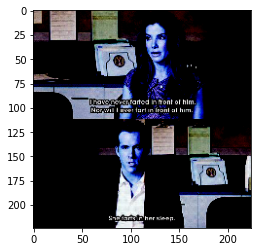

In [18]:
# lets see original image
plt.imshow(scaled_image)

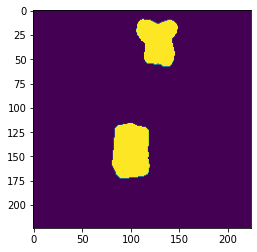

In [19]:
# lets ee predicted masks for the image
plt.imshow(pred_mask)

#### Observation : We can see in original image there are 2 faces. then in predicted image we can see 2 masks so by that we say our model is predicted good.

### Conclusion

* In this Project we predicted the masks of the faces in the screenshots of different movie clips.
* In this project we used Unet as the base model. with 3 trainable layers.
* we can use all layers in the model but it depends on GPU which your are working on.
* By using this model we achieved train score 0.80 and validation score 0.50.
* Model is in Over fitting condition but it is good that dice coefficient score for validation images is 0.50
* We can use many more available models. but they are complicated in low memory GPU's.

# PART 2

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

#### Change current working directory to project folder. [ Score: 2 points ]

In [20]:
# Change current working directory to project folder
import os
path = '/content/drive/MyDrive/CNN-Project-2/'
os.chdir(path)

#### Extract the zip file [ Score: 2 points ]
- Extract Aligned Face Dataset from Pinterest.zip

In [21]:
# Extract the Zip file
from zipfile import ZipFile
file_path = 'Aligned Face Dataset from Pinterest - CV project 2.zip'
with ZipFile(file_path, 'r') as z:
    z.extractall()

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [22]:
class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('./PINS/')

### Define function to load image
- Define a function to load image from the metadata

In [24]:
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image [ Score: 2 points ]
- Load one image using the function "load_image"

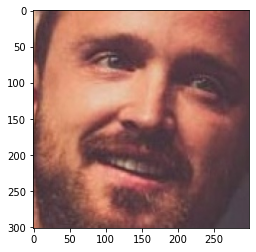

In [25]:
plt.imshow(load_image(str(metadata[0])))

In [23]:
# define a function which returns the count of unique images
def count_uniques(value):
    count=0
    for i in range(value,len(metadata)):
        path = str(metadata[i].name)
        if path==str(metadata[value].name):
            count+=1
        else:
              break
    return count

### Visualization

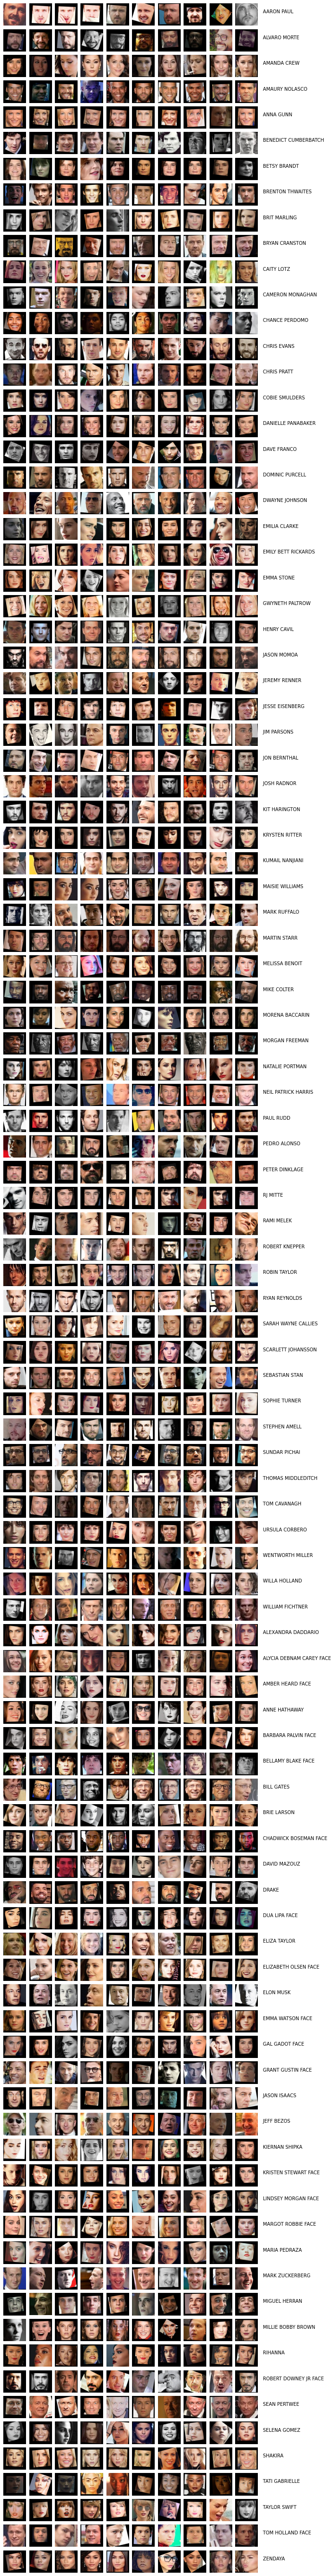

In [26]:
# lets plot the 10 images in every class
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(1, (300, 100))
grid = ImageGrid(fig, 111, nrows_ncols=(100, 10), axes_pad=0.1)

g=0
k=0
temp=0
for i in range(100):
    for j in range(10):
        img = load_image(str(metadata[k]))
        ax = grid[g]
        ax.imshow(img / 255.)
        ax.axis('off')
        k+=1
        if j == 9:
            ax.text(250, 112,metadata[k].name.replace('pins_','      ').upper(), verticalalignment='center')
            temp = temp+int(count_uniques(temp))
            k=int(temp)
        g += 1
        
plt.show()

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [27]:
def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model [ Score: 2 points ]
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [28]:
model = vgg_face()
weights_file =  "./Part 2 - vgg_face_weights.h5"
model.load_weights(weights_file)

### Get vgg_face_descriptor

In [29]:
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [30]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


#### Generate embeddings for all images  [ Score: 3 points ]
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [31]:
embeddings = np.zeros((metadata.shape[0], 2622))

for i, m in enumerate(metadata):
    img_path = m.image_path()
    img = load_image(img_path)

    # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
    img = (img / 255.).astype(np.float32)

    img = cv2.resize(img, dsize = (224,224))

    # Obtain embedding vector for an image
    # Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

    embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [32]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

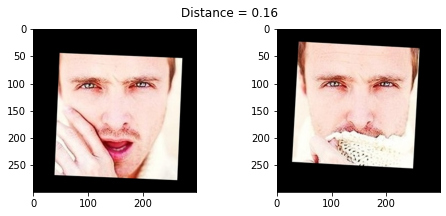

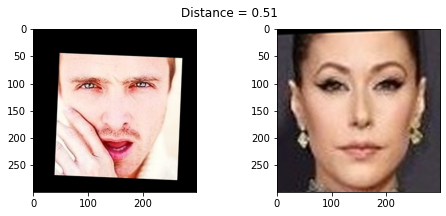

In [33]:
def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

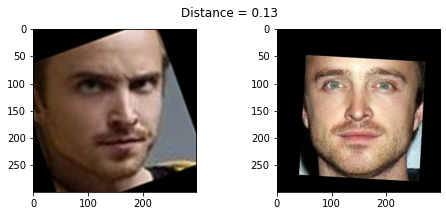

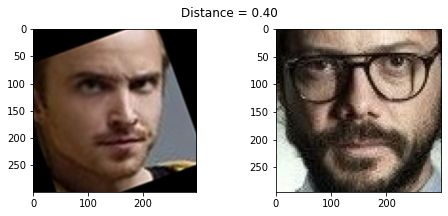

In [34]:
show_pair(30,31)
show_pair(30,100)

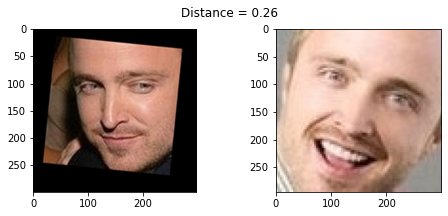

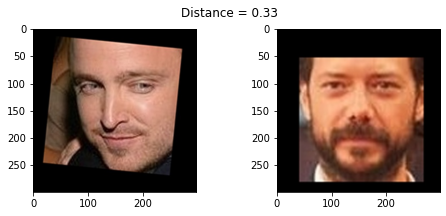

In [35]:
show_pair(70,72)
show_pair(70,115)

#### Standardize the feature values [ Score: 2 points ]
- Scale the features using StandardScaler

In [36]:
# Standarize features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# fit and transform the embeddings
scaled_embeddings = sc.fit_transform(embeddings)

#### Encode the Labels  [ Score: 2 points ]
- Encode the targets
- Use LabelEncoder

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# make a list of classes
classes = np.array([m.name for m in metadata])

# encode the lables using label encoder
encoded_classes = le.fit_transform(classes)

#### Create train and test sets [ Score: 2 points ]
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [38]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = scaled_embeddings[train_idx]
# another half as test examples of 10 identities
X_test = scaled_embeddings[test_idx]

#train labels
y_train = encoded_classes[train_idx]
#test labels
y_test = encoded_classes[test_idx]

In [39]:
# to free up space
del embeddings

#### Reduce dimensions using PCA (3 marks)
- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [40]:
from sklearn.decomposition import PCA
print(f'Before Applying PCA Shape of X_train : {X_train.shape}')
print(f'Before Applying PCA Shape of X_test : {X_test.shape}')

pca_model = PCA(n_components=128,whiten = True,random_state=1)
pca_model.fit(X_train)
X_train_pca = pca_model.transform(X_train)
X_test_pca = pca_model.transform(X_test)

print(f'\nAfter Applying PCA Shape of X_train : {X_train_pca.shape}')
print(f'After Applying PCA Shape of X_test : {X_test_pca.shape}')

Before Applying PCA Shape of X_train : (9573, 2622)
Before Applying PCA Shape of X_test : (1197, 2622)

After Applying PCA Shape of X_train : (9573, 128)
After Applying PCA Shape of X_test : (1197, 128)


#### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [41]:
from sklearn.svm import SVC

# initialize the svm model
svm_model = SVC(gamma = 'auto')
# train the model
svm_model.fit(X_train_pca,y_train)

SVC(gamma='auto')

In [42]:
from sklearn import metrics
# precit the test data using svm model
y_pred = svm_model.predict(X_test_pca)
svm_accuracy = metrics.accuracy_score(y_test, y_pred)

In [43]:
# print the accuracy of the model
print(svm_accuracy)

0.9632414369256475


#### Test results (2 marks)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

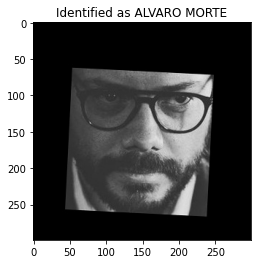

In [44]:
# load the image 10 th image from test data
example_image = load_image(metadata[test_idx][10].image_path())
# predict the image using svm_model
example_prediction = svm_model.predict([X_test_pca[10]])
# inverse transform the class to get the name of the class
example_identity = le.inverse_transform(example_prediction)[0]
example_identity = example_identity.replace('pins_','').upper()
plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

#### Observation : We can see that image is correctly predicted as ALVARO MORTE. So, over model is preciting good. lets test the model using external images

#### Testing External images

In [45]:
# define function which returns the embeddings of the image.

def embedd_image(path):
    img = load_image(path)
    # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
    img = (img / 255.).astype(np.float32)

    img = cv2.resize(img, dsize = (224,224))

    # Obtain embedding vector for an image
    # Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    return embedding_vector

In [46]:
# initialize the test-images paths
test_image1_path = 'Part 2 - Test Image - Dwayne Johnson4.jpg'
test_image2_path = 'Part 2- Test Image - Benedict Cumberbatch9.jpg'
test_embedding_images=np.zeros((2, 2622))

# make the embeddings of the test images.
test_embedding_images[0]=embedd_image(test_image1_path)
test_embedding_images[1]=embedd_image(test_image2_path)

In [47]:
# scale the images
test_embedding_images = sc.transform(test_embedding_images)

In [48]:
# Apply pca
test_embedding_images = pca_model.transform(test_embedding_images)

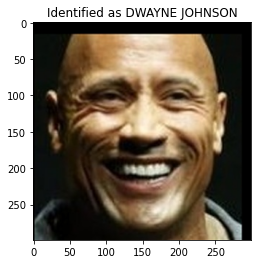

In [49]:
# predcit the first image. the person in the image is Dwayne Johson
test_image_prediction1 = svm_model.predict([test_embedding_images[0]])
example_identity = le.inverse_transform(test_image_prediction1)[0]
example_identity = example_identity.replace('pins_','').upper()
plt.imshow(load_image(test_image1_path))
plt.title(f'Identified as {example_identity}');

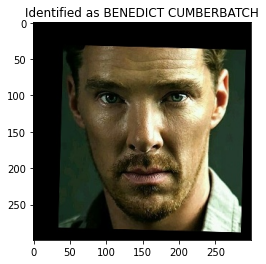

In [50]:
# predict the second image. the person in the image is Benedict cumberbatch
test_image_prediction2 = svm_model.predict([test_embedding_images[1]])
example_identity = le.inverse_transform(test_image_prediction2)[0]
example_identity = example_identity.replace('pins_','').upper()
plt.imshow(load_image(test_image2_path))
plt.title(f'Identified as {example_identity}');

#### Observation : We can see that svm_model is predict the 2 images correctly which tells us the model is good.

### Conclusion 

* In this project we are predicting images of the different Actress.
* In this project we uses pre-trained model and weights of VGGnet. weights which are used previously.
* When we use distance metrics over the embeddings of the data we get good results but with differebt faces also the distance is low in some cases.
* To overcome this drawback we used SVM model to predict the Embeddings of the data.
* when we use svm model on Embeddings the model is performed well and we are getting good results with all our training images.
* Accuracy of the svm_model is over 94% on test data which is good at all.